In [1]:
!pip install tensorflow
!pip install datasets
!pip install transformers

In [2]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 38.0 MB/s eta 0:00:00a 0:00:01


In [3]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tensorflow_addons as tfa

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

print(tf.__version__)

2.15.0


/opt/homebrew/lib/python3.11/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
import numpy as np
import tensorflow_datasets as tfds

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
def preprocess(image, label):
    image = tf.image.resize(image, [96, 96])
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    return image, label


In [6]:
def augment(image, label):
    image = tf.image.resize(image, [96, 96])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1) # Adjust brightness by up to 10%
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1) # Adjust contrast between 90% and 110%
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


(ds_train, ds_validation), ds_info = tfds.load(
    'malaria',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True,
)

train_ds = ds_train.map(augment).batch(32).prefetch(tf.data.AUTOTUNE)

val_ds = ds_validation.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [7]:
img_width = 96
img_height= 96

**Building the CNN Model**

In [8]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape =(img_width, img_height,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32, (3,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 47, 47, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 64)        0

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,
                    epochs= 10,
                    validation_data = val_ds,)

Epoch 1/10
689/689 [==============================] - 25s 36ms/step - loss: 0.4137 - accuracy: 0.8006 - val_loss: 0.1636 - val_accuracy: 0.9514
Epoch 2/10
689/689 [==============================] - 25s 36ms/step - loss: 0.1567 - accuracy: 0.9516 - val_loss: 0.1476 - val_accuracy: 0.9539
Epoch 3/10
689/689 [==============================] - 25s 36ms/step - loss: 0.1432 - accuracy: 0.9544 - val_loss: 0.1426 - val_accuracy: 0.9556
Epoch 4/10
689/689 [==============================] - 25s 36ms/step - loss: 0.1374 - accuracy: 0.9565 - val_loss: 0.1412 - val_accuracy: 0.9548
Epoch 5/10
689/689 [==============================] - 24s 35ms/step - loss: 0.1309 - accuracy: 0.9573 - val_loss: 0.1385 - val_accuracy: 0.9566
Epoch 6/10
689/689 [==============================] - 25s 36ms/step - loss: 0.1264 - accuracy: 0.9580 - val_loss: 0.1462 - val_accuracy: 0.9557
Epoch 7/10
689/689 [==============================] - 25s 36ms/step - loss: 0.1247 - accuracy: 0.9590 - val_loss: 0.1410 - val_accuracy:

In [12]:
history.history

{'loss': [0.41367220878601074,
  0.15673018991947174,
  0.1432078629732132,
  0.13735046982765198,
  0.13090623915195465,
  0.1263943910598755,
  0.12473031878471375,
  0.12062126398086548,
  0.11896130442619324,
  0.11765537410974503],
 'accuracy': [0.8005987405776978,
  0.9516012072563171,
  0.9544134736061096,
  0.9565000534057617,
  0.957271158695221,
  0.9580422639846802,
  0.9590401649475098,
  0.9594937562942505,
  0.9601288437843323,
  0.9601288437843323],
 'val_loss': [0.16361597180366516,
  0.14762327075004578,
  0.14259159564971924,
  0.14121925830841064,
  0.13853439688682556,
  0.14619171619415283,
  0.14101438224315643,
  0.1370861828327179,
  0.1361445039510727,
  0.12862369418144226],
 'val_accuracy': [0.9513788223266602,
  0.9539186954498291,
  0.9555515050888062,
  0.9548258185386658,
  0.9566400647163391,
  0.9557329416275024,
  0.9577285647392273,
  0.9582728743553162,
  0.9579100012779236,
  0.9584543108940125]}

In [13]:
model.save('model_1.h5')

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
def plot_learningCurve(history, epoch):
  epoch_range= range(1, epoch+1)
  #plot training and validation accuracy values
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  #plot training and validation accuracy values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

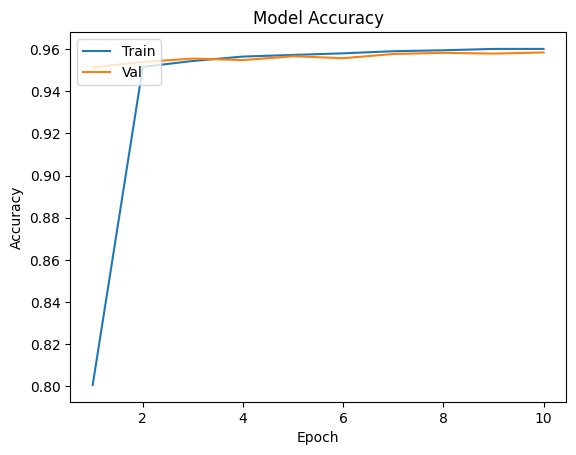

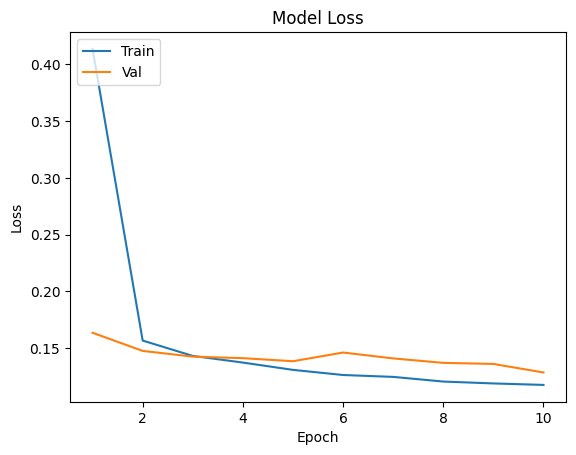

In [15]:
plot_learningCurve(history, 10)

173/173 [==============================] - 2s 11ms/step


<Figure size 1000x1000 with 0 Axes>

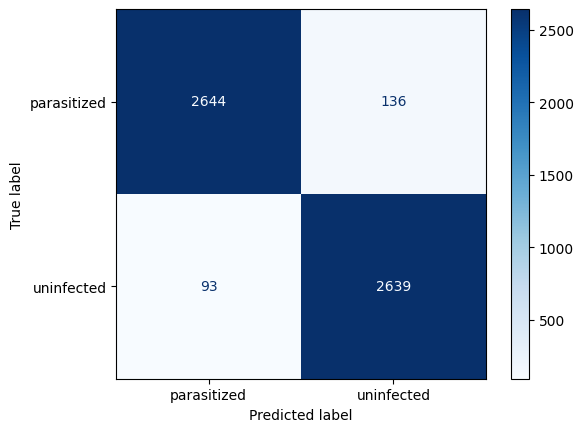

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Making predictions with the model
val_images, val_labels = next(iter(val_ds.unbatch().batch(len(ds_validation))))
val_predictions = model.predict(val_images)
val_pred_classes = (val_predictions > 0.5).astype(int)  # Binary classification threshold

# Computing the confusion matrix
cm = confusion_matrix(val_labels, val_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ds_info.features['label'].names)

# Plotting the confusion matrix
plt.figure(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues)
plt.show()